# 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [1]:
!head -n 10 ../data/neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。


In [2]:
from itertools import groupby, islice

def gen_morph_of_sentence():    
    mecab_format = ['表層形', '品詞','品詞細分類1', '品詞細分類2', '品詞細分類3', '活用形', '活用型','原型','読み','発音']
    filtered_result_format = ['表層形', '品詞','品詞細分類1','原型']
    with open('../data/neko.txt.mecab') as f:
        morph_of_sentense = []
        for line in f:
            if line == 'EOS\n':
                yield morph_of_sentense
                morph_of_sentense = []
            else:
                full_morph_result = dict(zip(mecab_format, line.replace('\t', ',').replace('\n', ',').split(',')))
                morph_of_sentense.append({k: v for k, v in full_morph_result.items() if k in filtered_result_format})

for morph_of_sentence in islice(gen_morph_of_sentence(), 5):
    print(morph_of_sentence)

[{'表層形': '一', '品詞': '名詞', '品詞細分類1': '数', '原型': '一'}]
[]
[{'表層形': '\u3000', '品詞': '記号', '品詞細分類1': '空白', '原型': '\u3000'}, {'表層形': '吾輩', '品詞': '名詞', '品詞細分類1': '代名詞', '原型': '吾輩'}, {'表層形': 'は', '品詞': '助詞', '品詞細分類1': '係助詞', '原型': 'は'}, {'表層形': '猫', '品詞': '名詞', '品詞細分類1': '一般', '原型': '猫'}, {'表層形': 'で', '品詞': '助動詞', '品詞細分類1': '*', '原型': 'だ'}, {'表層形': 'ある', '品詞': '助動詞', '品詞細分類1': '*', '原型': 'ある'}, {'表層形': '。', '品詞': '記号', '品詞細分類1': '句点', '原型': '。'}]
[{'表層形': '名前', '品詞': '名詞', '品詞細分類1': '一般', '原型': '名前'}, {'表層形': 'は', '品詞': '助詞', '品詞細分類1': '係助詞', '原型': 'は'}, {'表層形': 'まだ', '品詞': '副詞', '品詞細分類1': '助詞類接続', '原型': 'まだ'}, {'表層形': '無い', '品詞': '形容詞', '品詞細分類1': '自立', '原型': '無い'}, {'表層形': '。', '品詞': '記号', '品詞細分類1': '句点', '原型': '。'}]
[]


## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [3]:
def extract_verb(form):
    words = []
    for morph_of_sentence in gen_morph_of_sentence():
        words += [morph[form] for morph in morph_of_sentence if morph['品詞'] == '動詞']
    return set(words)
    
for verb_surface in islice(extract_verb('表層形'), 10):
    print(verb_surface)

やめる
分け
引き付け
磨き
伏せっ
届い
刻ん
ころがり
かま
漕ぎ


## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [4]:
for verb_surface in islice(extract_verb('原型'), 10):
    print(verb_surface)

やめる
あきる
取り合う
取上げる
阿る
かわす
つむ
巡る
適す
為す


## 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [5]:
def extract_noun(pos_detail1):
    words = []
    for morph_of_sentence in gen_morph_of_sentence():
        words += [morph['表層形'] for morph in morph_of_sentence if morph['品詞細分類1'] == pos_detail1]
    return set(words)
    
for verb_surface in islice(extract_noun('サ変接続'), 10):
    print(verb_surface)

回向
突進
相違
訓戒
誘致
白状
欠勤
置き去り
露出
通用


## 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [6]:
def knock_34():
    noun_phrases = []
    for morph_of_sentence in gen_morph_of_sentence():    
        for i, morph in enumerate(morph_of_sentence):
            if morph['品詞'] == '助詞' and morph['表層形'] == 'の' and i != 0 and i < len(morph_of_sentence)-1: #for avoiding IndexError 
                noun_phrases.append(morph_of_sentence[i-1]['表層形'] + morph['表層形'] + morph_of_sentence[i+1]['表層形'])
    return set(noun_phrases)

for noun_phrase in islice(knock_34(), 10):
    print(noun_phrase)

さんの庭口
他の動物
人間の十
前の方
不思議の極
週間の間
僕のうち
腹の上
疱瘡のため
相当の論拠


## 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [7]:
def knock_35():
    conjunction_nouns = []
    for morph_of_sentence in gen_morph_of_sentence():
        conjunction_noun = []
        for is_noun, morph_of_conjunction_noun in groupby(morph_of_sentence, key=lambda morph: morph['品詞'] == '名詞'):
            if is_noun:
                conjunction_noun = [morph['表層形'] for morph in morph_of_conjunction_noun]
            else:
                if len(conjunction_noun) > 2:
                    conjunction_nouns.append("".join(conjunction_noun))
                conjunction_noun = []
    return set(conjunction_nouns)
                
for conjunction_noun in islice(knock_35(), 10):
    print(conjunction_noun)

居士安永五年辰正月
二十分
欧洲人こと
鉄牛心
次郎ちゃんとこ
候折柄
空也餅引掛所
一体車屋
迷亭君自身
数千年来


## 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [8]:
from collections import Counter

def knock_36():
    word_counter = Counter()
    for morph_of_sentence in gen_morph_of_sentence():
        word_counter.update([morph['表層形'] for morph in morph_of_sentence if morph['品詞'] != '記号'])
    return word_counter.most_common()

for word_high_frequency in islice(knock_36(), 20):
    print(word_high_frequency)

('の', 9194)
('て', 6868)
('は', 6420)
('に', 6243)
('を', 6071)
('と', 5508)
('が', 5337)
('た', 3988)
('で', 3806)
('も', 2479)
('ない', 2390)
('だ', 2363)
('し', 2322)
('から', 2032)
('ある', 1728)
('な', 1613)
('ん', 1568)
('か', 1530)
('いる', 1249)
('事', 1207)


## 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

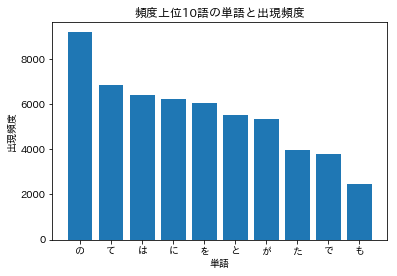

In [9]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib import rcParams

font_path = '/usr/local/share/fonts/ipaexg.ttf'
fp = FontProperties(fname=font_path)
rcParams['font.family'] = fp.get_name()

def knock_37():
    words_count = islice(knock_36(), 10)
    zipped_words_count_list = list(zip(*words_count))
    word_list = zipped_words_count_list[0]
    count_list = zipped_words_count_list[1]
    
    plt.bar(range(len(word_list)), count_list, width=0.8)
    plt.title('頻度上位10語の単語と出現頻度')
    plt.xticks(range(len(word_list)), word_list)
    plt.xlabel('単語')
    plt.ylabel('出現頻度')
    plt.show()
    
knock_37()

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

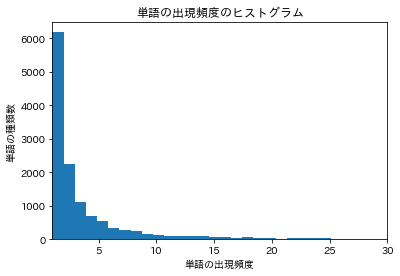

In [10]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

def knock_38():
    count_list =[word_count[1] for word_count in knock_36()]
    
    plt.hist(count_list, bins=30, range=(1, 30))
    plt.title('単語の出現頻度のヒストグラム')
    plt.xlim(xmin=1, xmax=30)
    plt.xlabel('単語の出現頻度')
    plt.ylabel('単語の種類数')
    plt.show()
    
knock_38()

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

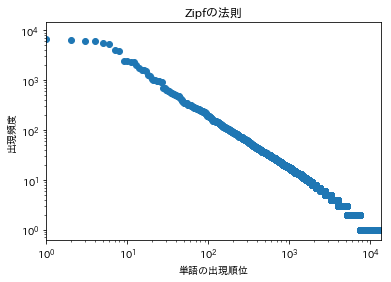

In [11]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

def knock_39():
    words_count = knock_36()
    zipped_words_count_list = list(zip(*words_count))
    word_list = zipped_words_count_list[0]
    count_list = zipped_words_count_list[1]

    plt.scatter(range(len(word_list)), count_list)
    plt.title('Zipfの法則')
    plt.xscale("log")
    plt.xlim(xmin=1, xmax=len(word_list))
    plt.yscale("log")
    plt.xlabel('単語の出現順位')
    plt.ylabel('出現頻度')
    plt.show()
    
knock_39()